## Importing libaries

In [202]:
import pandas as pd

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.chdir('../Preprocessing')
from normalization import normalize_corpus

## Reading the data

In [44]:
df = pd.read_csv('../Data collection/data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312 entries, 0 to 17311
Data columns (total 5 columns):
Unnamed: 0    17312 non-null int64
URL           17312 non-null object
CATEGORY      17312 non-null object
CONTENT       17312 non-null object
SUMMARY       17312 non-null object
dtypes: int64(1), object(4)
memory usage: 676.3+ KB


## Data Exploration

## Normalizing the data

#### The implementation of this is available under normalization.py located in preprocessing folder

In [45]:
df['FILTERED_CONTENT'] = df['CONTENT'].apply(normalize_corpus)

In [46]:
df.head()

,Unnamed: 0,URL,CATEGORY,CONTENT,SUMMARY,FILTERED_CONTENT
0,1,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,business,Paris/London/Atlanta: Federal Reserve Bank of ...,Paris/London/Atlanta: Federal Reserve Bank of ...,federal reserve bank philadelphia president ch...
1,4,http://www.moneynews.com/Economy/federal-reser...,business,Severe winter weather likely affected U.S. job...,Severe winter weather likely affected U.S. job...,severe winter weather likely affected job grow...
2,6,http://www.marketwatch.com/story/feds-plosser-...,business,PARISn — The Federal Reserve may have to accel...,“We must back away from increasing the degree ...,parisn the federal reserve may accelerate pace...
3,7,http://www.fxstreet.com/news/forex-news/articl...,business,FXStreet (Łódź) - Philadelphia Fed President C...,FXStreet (Łódź) - Philadelphia Fed President C...,fxstreet łódź philadelphia fed president charl...
4,9,http://www.iii.co.uk/news-opinion/reuters/news...,business,The value of international investments may be ...,The value of international investments may be ...,the value international investment may affect ...


Text(0.5, 1.0, 'Before sampling')

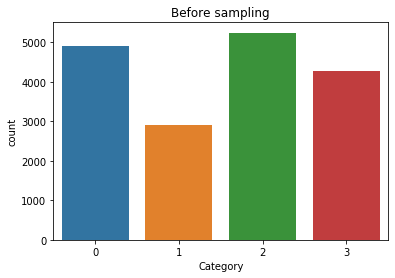

In [159]:
# Encode labels in column 'category'.
label_encoder = preprocessing.LabelEncoder() 
df['CATEGORY']= label_encoder.fit_transform(df['CATEGORY']) 

sns.countplot(df.CATEGORY)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Before sampling')

Text(0.5, 1.0, 'After sampling')

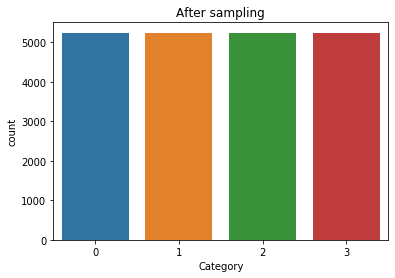

In [158]:
#Sampling the data

df0 = df[df.CATEGORY==0]
df1 = df[df.CATEGORY==1]
df2 = df[df.CATEGORY==2]
df3 = df[df.CATEGORY==3]

samples = df.CATEGORY.value_counts().tolist()



df0 = resample(df0, 
                   replace=True,   
                   n_samples=samples[0], 
                   random_state=1130)
df1 = resample(df1, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df2 = resample(df2, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df3 = resample(df3, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)


df_sampled = pd.concat([df0,df1,df2,df3])





sns.countplot(df_sampled.CATEGORY)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('After sampling')

## Feature Extraction using Bag of words

In [142]:
training_set, test_set, training_labels, test_labels = train_test_split(df2["FILTERED_CONTENT"], df2["CATEGORY"], test_size=0.33, random_state=42)


In [ ]:
#Bag of words
vectorizer = CountVectorizer(min_df =2, ngram_range=(2,2))
bow_train_features = vectorizer.fit_transform(training_set)
bow_test_features = vectorizer.transform(test_set)

#### Classification using Bag of words features

C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression using Bag of words

Accuracy:  95.27388350917762 

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1707
           1       0.98      0.96      0.97      1786
           2       0.93      0.95      0.94      1754
           3       0.96      0.96      0.96      1672

    accuracy                           0.95      6919
   macro avg       0.95      0.95      0.95      6919
weighted avg       0.95      0.95      0.95      6919



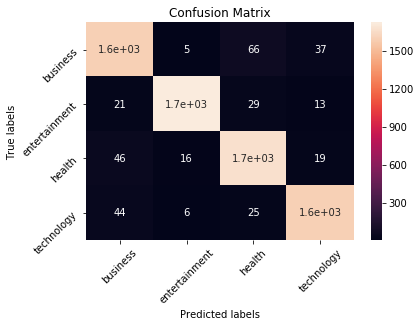

In [205]:
#Logistic Regression

logRegModel = LogisticRegression()
logRegModel.fit(bow_train_features,training_labels)

predictions_lr = logRegModel.predict(bow_test_features)

print("Logistic Regression using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_lr, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


MultiNomial Naive Bayes using Bag of words

Accuracy:  94.18991183697067 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1707
           1       0.97      0.97      0.97      1786
           2       0.93      0.93      0.93      1754
           3       0.94      0.95      0.94      1672

    accuracy                           0.94      6919
   macro avg       0.94      0.94      0.94      6919
weighted avg       0.94      0.94      0.94      6919



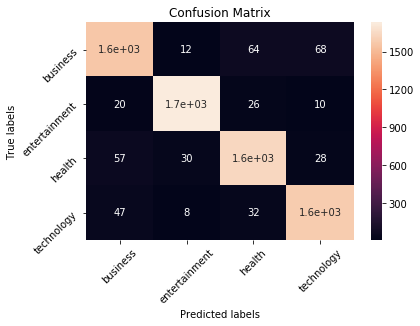

In [204]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(bow_train_features,training_labels)

predictions_mnb = mnb.predict(bow_test_features)

print("MultiNomial Naive Bayes using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_mnb, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


Support Vector Machine using Bag of words

Accuracy:  94.04538228067639 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1707
           1       0.98      0.95      0.97      1786
           2       0.90      0.96      0.92      1754
           3       0.96      0.94      0.95      1672

    accuracy                           0.94      6919
   macro avg       0.94      0.94      0.94      6919
weighted avg       0.94      0.94      0.94      6919



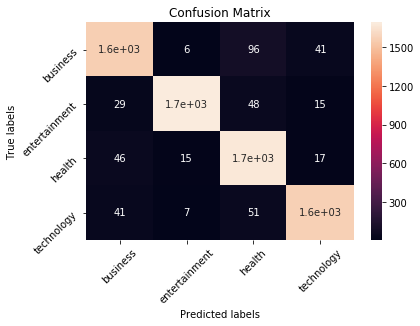

In [206]:
#Support Vector Machines

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(bow_train_features,training_labels)

predictions_SVM = SVM.predict(bow_test_features)

print("Support Vector Machine using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_SVM, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


## Feature Extractiong using TF-IDF vector

In [139]:
#Tfidf 
tfidvectorizer = TfidfVectorizer(min_df=2, 
                                 ngram_range=(2,2),
                                 smooth_idf=True,
                                 use_idf=True)
tfid_train_features = tfidvectorizer.fit_transform(training_set)

tfid_test_features = tfidvectorizer.transform(test_set)

#### Classification using TF-IDF features

Logistic Regression using TF-IDF

Accuracy:  94.88365370718313 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1707
           1       0.98      0.98      0.98      1786
           2       0.95      0.92      0.94      1754
           3       0.94      0.96      0.95      1672

    accuracy                           0.95      6919
   macro avg       0.95      0.95      0.95      6919
weighted avg       0.95      0.95      0.95      6919



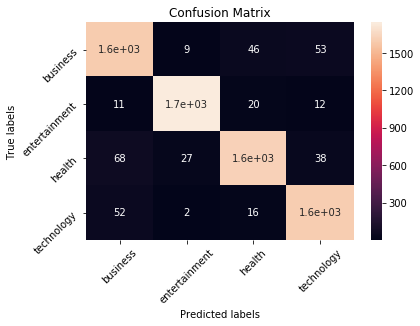

In [208]:
logRegModel = LogisticRegression()
logRegModel.fit(tfid_train_features,training_labels)

predictions_lr = logRegModel.predict(tfid_test_features)
score_lr = logRegModel.score(tfid_test_features,test_labels)

print("Logistic Regression using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_lr, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


MultiNomial Naive Bayes using TF-IDF

Accuracy:  94.3778002601532 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1707
           1       0.98      0.97      0.98      1786
           2       0.94      0.93      0.94      1754
           3       0.93      0.95      0.94      1672

    accuracy                           0.94      6919
   macro avg       0.94      0.94      0.94      6919
weighted avg       0.94      0.94      0.94      6919



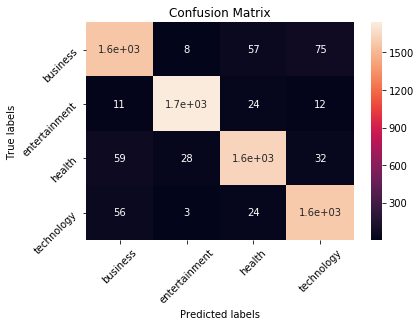

In [209]:
#Naive Bayes
mnb = MultinomialNB()

mnb.fit(tfid_train_features,training_labels)

predictions_mnb = mnb.predict(tfid_test_features)

print("MultiNomial Naive Bayes using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_mnb, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


Support Vector Machine using IF-IDF

Accuracy:  95.44731897673074 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1707
           1       0.99      0.97      0.98      1786
           2       0.95      0.94      0.94      1754
           3       0.95      0.96      0.96      1672

    accuracy                           0.95      6919
   macro avg       0.95      0.95      0.95      6919
weighted avg       0.95      0.95      0.95      6919



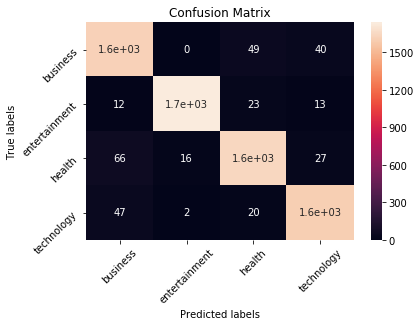

In [207]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfid_train_features,training_labels)

predictions_SVM = SVM.predict(tfid_test_features)


print("Support Vector Machine using IF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_SVM, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
